In [21]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [22]:
image = cv2.imread('car_pm.jpg')

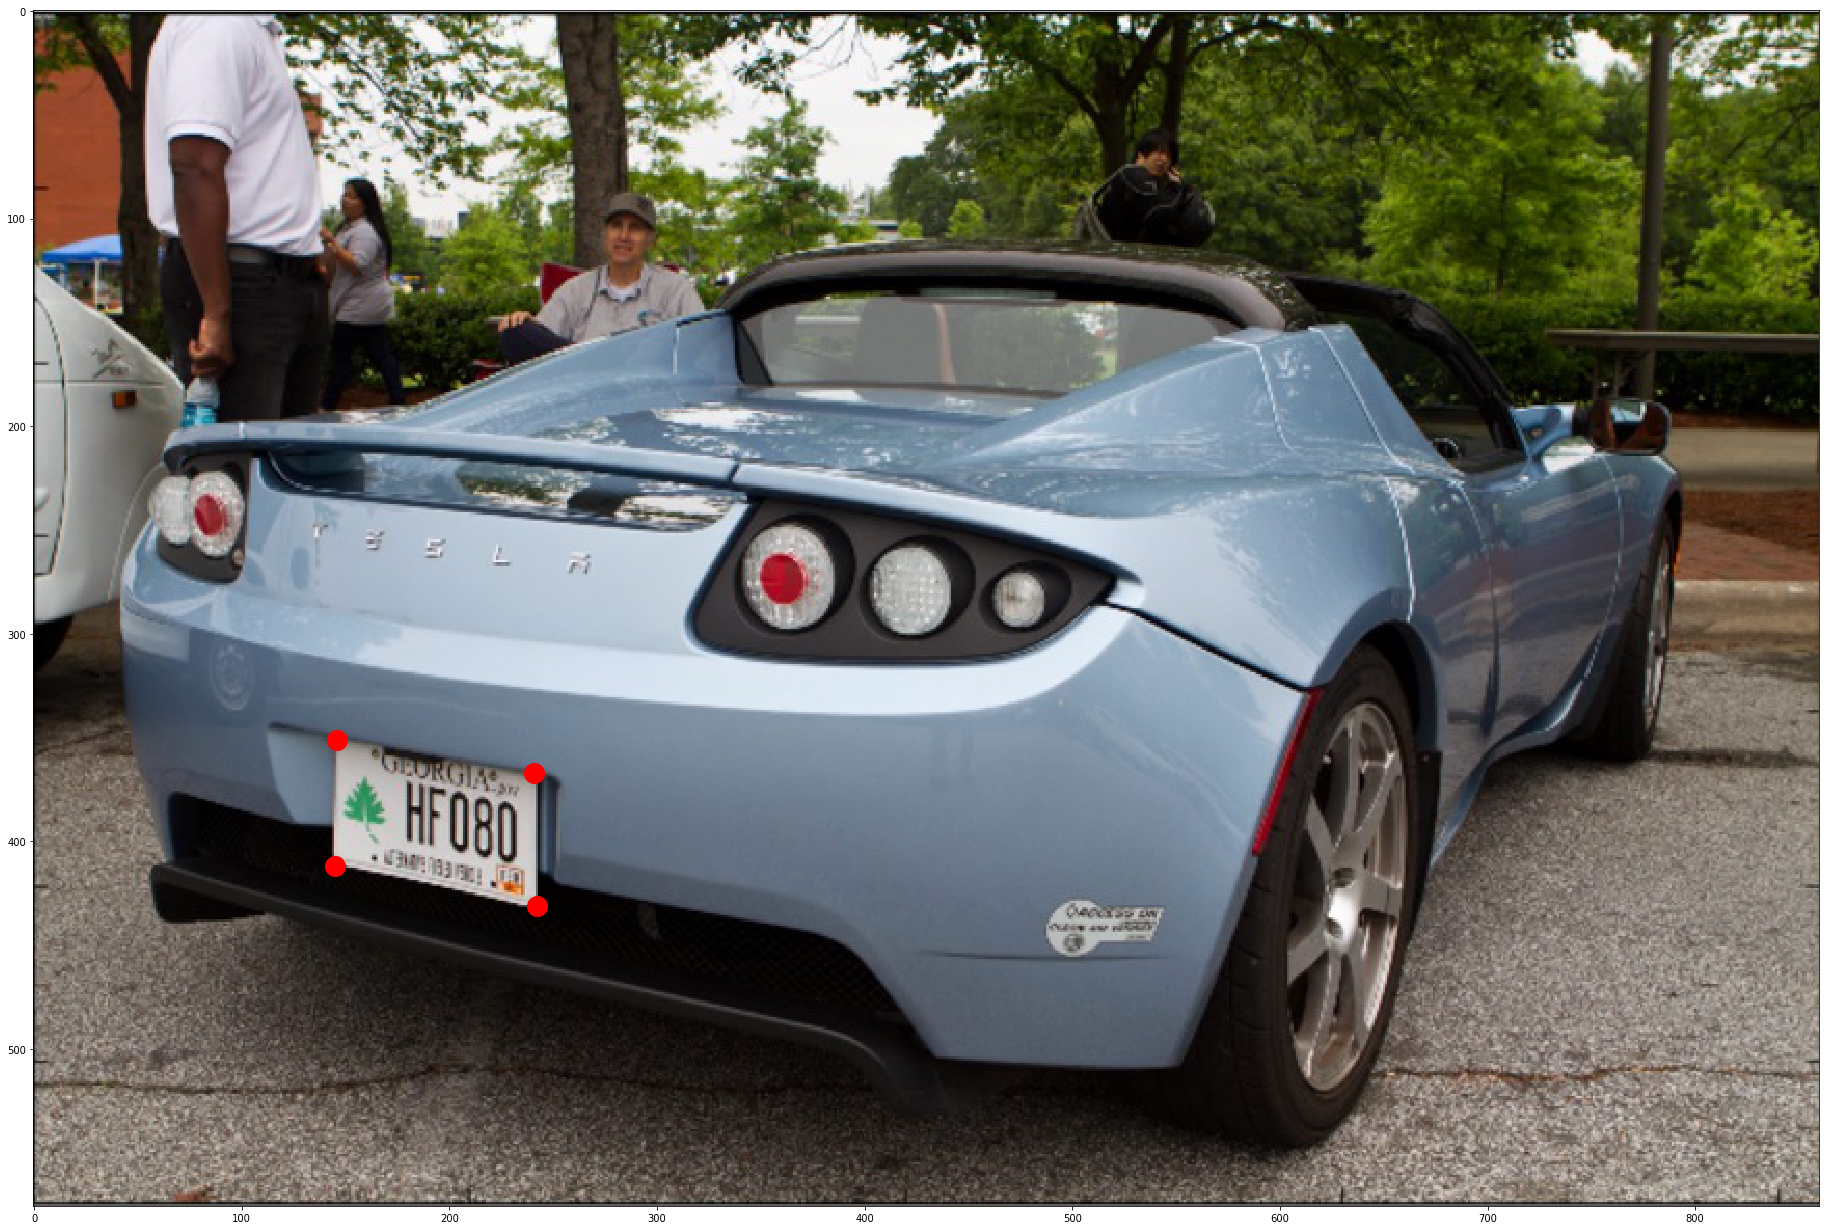

In [49]:
source_pts = np.float32(
        [[146, 351],
         [145, 412],
         [242, 431],
         [241, 367]])

x = source_pts[:,0]
y = source_pts[:,1]
c = 'r'

fig = plt.figure(1,(32,32))
ax = fig.add_subplot(111)
ax.imshow(image[:,:,::-1])
ax.scatter(x,y,s=400,c=c)

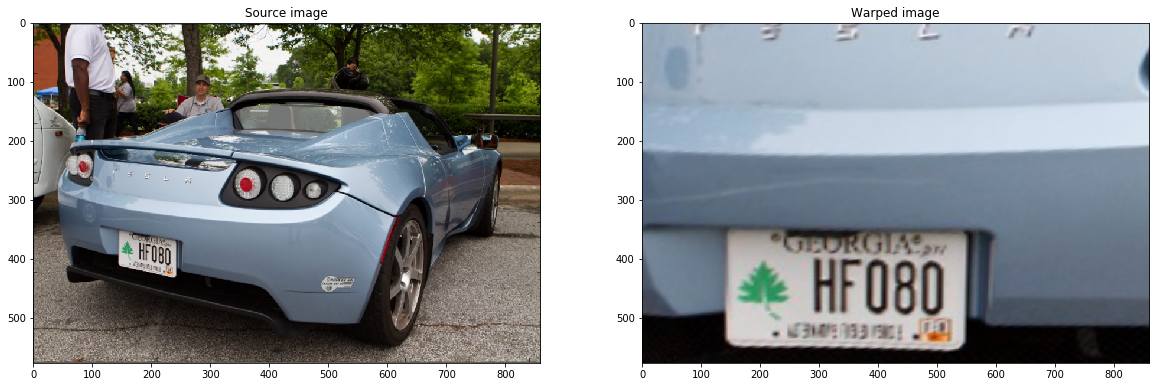

In [56]:
## TODO: Define the geometric tranform function
## This function take in an image and returns a 
## geometrically transformed image
def geo_tx(image):
    image_size = (image.shape[1], image.shape[0])
    
    ## TODO: Define the four source coordinates (TL,BL,BR,TR)
    source_pts = np.float32(
        [[146, 351],
         [145, 412],
         [242, 431],
         [241, 367]])
    
    ## TODO: Define the four destination coordinates    
    ## Tip: These points should define a 400x200px rectangle
    warped_pts = np.float32(
        [[146, 351],
         [146, 551],
         [546, 551],
         [546, 351]])
    
    ## TODO: Compute the perspective transform, M
    M = cv2.getPerspectiveTransform(source_pts, warped_pts)
    
    ## TODO: Using M, create a warped image named `warped`
    warped = cv2.warpPerspective(image[:,:,::-1], M, image_size,
                            flags=cv2.INTER_AREA)

    return warped
    
    
# ---------------------------------------------------------- #
# Make a copy of the original image and warp it
warped_image = np.copy(image)
warped_image = geo_tx(warped_image)

if(warped_image is not None):
    # Visualize
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    ax1.set_title('Source image')
    ax1.imshow(image[:,:,::-1])
    ax2.set_title('Warped image')
    ax2.imshow(warped_image)
else:
    print('No warped image was returned by your function.')